<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
from dask.distributed import Client, LocalCluster

cluster = LocalCluster(n_workers=2, threads_per_worker=1, memory_limit=2e9)
client = Client(cluster)
client

Client Scheduler: tcp://127.0.0.1:44331 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 2 Cores: 2 Memory: 4.00 GB


In [2]:
import datetime as dt
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

xr.set_options(keep_attrs = True)
%load_ext autoreload
%autoreload 2

In [3]:
from data_analysis.basic_calcs import *

In [ ]:
ds = get_tamsat_ds("precip")

distributed.nanny - WARNING - Restarting worker
distributed.nanny - WARNING - Restarting worker


/opt/anaconda/lib/python3.7/site-packages/numpy/core/_methods.py:151: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)


Only have data up to month 5, using as current


/opt/anaconda/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1508: UserWarning: The following kwargs were not used by contour: 'spacing'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


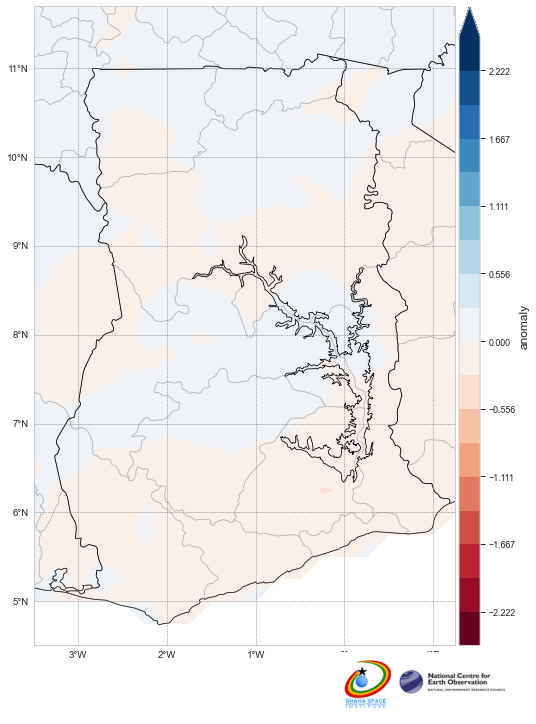

In [9]:
m, s = get_climatology("TAMSAT", "precip")
z_score = calculate_z_score(ds, clim_mean=m, clim_std=s)
_ = plot_z_score(
    z_score,
    cmap=plt.cm.RdBu,
    contour=True,
    vmin=None,
    vmax=None,
    levels=np.linspace(-2.5, 2.5, 19),
)

m = n = z_score = ds = None



Only have data up to month 7, using as current


/opt/anaconda/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1508: UserWarning: The following kwargs were not used by contour: 'spacing'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


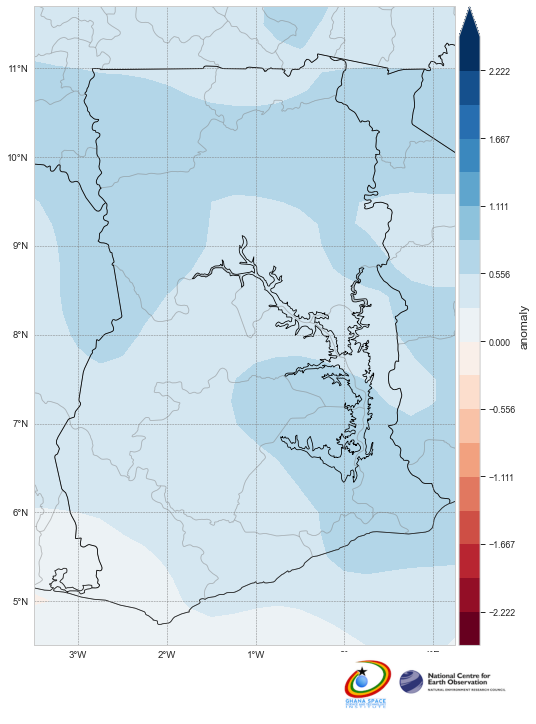

In [11]:
ds = get_era5_ds('ssrd')
m, s = get_climatology("ERA", "ssrd")
z_score = calculate_z_score(ds, clim_mean=m, clim_std=s)
fig = plot_z_score(z_score,contour=True)


Only have data up to month 6, using as current


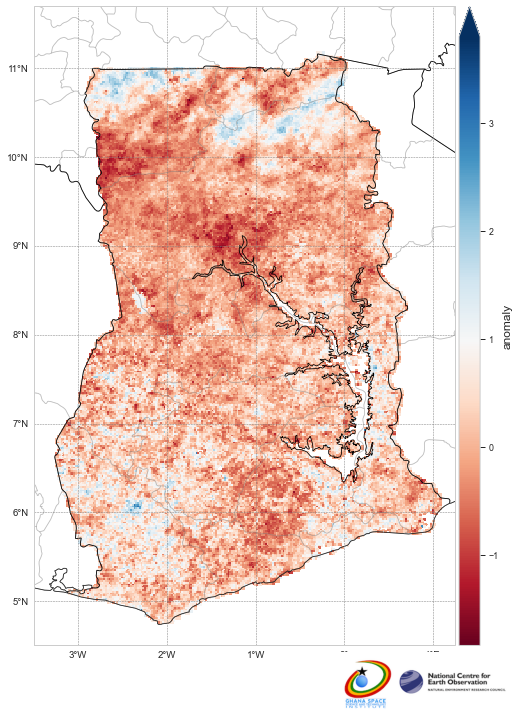

In [6]:
ds = get_modis_ds()
m, s = get_climatology("MODIS", "Fpar_500m")
z_score = calculate_z_score(ds)
_ = plot_z_score(z_score,contour=False)


In [5]:
ds

,Array,Chunk
Bytes,71.24 MB,1.02 kB
Shape,"(826, 375, 230)","(1, 32, 32)"
Count,158611 Tasks,79296 Chunks
Type,uint8,numpy.ndarray
